### Loading api or libraries

In [1]:
import pandas as pd # For Dataframe
import numpy as np # For Math 
from sklearn.preprocessing import OrdinalEncoder #Encode categorical features as an integer array.

In [2]:
#Load the dataset

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/edyoda/Data-Scientist-program/master/Practice%20Problems/data/yellow-small%2Badult-stretch.data',names=['color','size','act','age','inflated'])

In [4]:
data.head()

,color,size,act,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,T
4,YELLOW,LARGE,STRETCH,ADULT,T


color => color of the balloon
size  => size of the baloon
act   => Strcth the ballon or dip the balloon
inflated => whether the balloon inflated ie True or not False

In [5]:
data

,color,size,act,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,T
4,YELLOW,LARGE,STRETCH,ADULT,T
5,YELLOW,LARGE,STRETCH,CHILD,F
6,YELLOW,LARGE,DIP,ADULT,F
7,YELLOW,LARGE,DIP,CHILD,F
8,PURPLE,SMALL,STRETCH,ADULT,T
9,PURPLE,SMALL,STRETCH,CHILD,F


In [6]:
data.isnull().sum()

color       0
size        0
act         0
age         0
inflated    0
dtype: int64

No null values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
color       16 non-null object
size        16 non-null object
act         16 non-null object
age         16 non-null object
inflated    16 non-null object
dtypes: object(5)
memory usage: 720.0+ bytes


All data is categorical, lets change it into integer data for our algorithm to work on it

### Preprocessing the data

In [8]:
oe =OrdinalEncoder()

In [9]:
feature_target = oe.fit_transform(data)

In [10]:
feature_target

array([[1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 1.],
       [1., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1.],
       [1., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 1.],
       [0., 1., 1., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

feature_target is a array, let's convert it into Dataframe

In [11]:
df = pd.DataFrame(feature_target, columns = ['color','size','act','age','inflated'], dtype = int)

In [12]:
df.head(6)

,color,size,act,age,inflated
0,1,1,1,0,1
1,1,1,1,1,1
2,1,1,0,0,1
3,1,1,0,1,1
4,1,0,1,0,1
5,1,0,1,1,0


### Implementing Entropy

In [45]:
class MyDtreeClassifier:
    
    def __init__(self):
        self.feature_ranges = {} # A dictionary to capture all feature ranges in our dataframe
        
    
    def createdecisionsfromdata(self, feature_data):
        self.decisions = []
        for col in feature_data.columns:
            range_info = []
            i = 0.5  # As most our data is 0 or 1 or the bucket will be > 0.5 or < 0.5
            cat_max = feature_data[col].max()
            while i < cat_max:
                range_info.append(i)
                i += 1
            self.feature_ranges[col] = range_info
            # This will give us buckets such as {'color': [0.5], 'size': [0.5], 'act': [0.5], 'age': [0.5]}
            
        decisions = list(self.feature_ranges.items())
            
        for f, bucket in decisions:
            for b in bucket:
                self.decisions.append((f,b))
       
        # This will give decisions as [('color', 0.5), ('size', 0.5), ('act', 0.5), ('age', 0.5)]
        
    
    def calEntropy(self,target):
        entropy = 0
        total = target.value_counts().values.sum()
        l = list(target.value_counts().values)
        for e in l:
            entropy += (-((e/total) * (np.log2(e/total))))  # gini = summation(pi * (1- pi))
        return entropy
    
    def select_decision(self, data):
        EntropyBeforeSplit = self.calEntropy(data.target)
        if EntropyBeforeSplit == 0:
            return 
        print('EntropyBeforeSplit',EntropyBeforeSplit)
       
        max_info_gain = 0
        for feature,value in self.decisions:
            data_left = data[data[feature] < value]
           
            EntropyLeft = self.calEntropy(data_left.target)
            data_right = data[data[feature] > value]
            EntropyRight = self.calEntropy(data_right.target)
            
            EntropySplit = (data_left.shape[0]/data.shape[0])* EntropyLeft + (data_right.shape[0]/data.shape[0])* EntropyRight
            InfoGain =  EntropyBeforeSplit -  EntropySplit
    
            
            if InfoGain > max_info_gain:
                max_info_gain = InfoGain
                best_data_left = data_left
                best_data_right = data_right
                best_feature = feature
                best_value = value
       
        print(best_feature,best_value)
        self.select_decision(best_data_left)
        self.select_decision(best_data_right)
        
    #Calculate Info Gain for each decision & chose the one which is best
    def myfit(self, feature_data, target_data):
        feature_data['target'] = target_data
        data = feature_data
        self.select_decision(data)
        
    
    def mypredict(self,feature_data, target_data):
        pass
        

In [46]:
dt = MyDtreeClassifier()

In [47]:
dt.createdecisionsfromdata(df.drop(columns = ['inflated']))

In [48]:
dt.myfit(df.drop(columns = ['inflated']), data.inflated)

EntropyBeforeSplit 0.9886994082884974
color 0.5
EntropyBeforeSplit 0.8112781244591328
act 0.5
EntropyBeforeSplit 1.0
age 0.5
EntropyBeforeSplit 0.954434002924965
size 0.5
EntropyBeforeSplit 0.8112781244591328
act 0.5
EntropyBeforeSplit 1.0
age 0.5


In [57]:
# Attempted to created tree using above values
class Node:
    def __init__(self, root):
        self.left = None
        self.right = None
        self.root = root
    
    def insert(self,data):
        if self.root:
            if data < self.root :
                if self.left is None:
                    self.left = Node(data)
                else:
                    self.left.insert(data)
            elif data > self.root :
                if self.right is None:
                    self.right = Node(data)
                else:
                    self.right.insert(data)
        else:
                self.root = data
        
    def print_tree(self):
        if self.left:
            self.left.print_tree()
        print(self.root)
        if self.right:
            self.right.print_tree()
        
root_node = Node(0.98)
l = [ 0.81, 1, 0.95, 0.5, 0.81,1] # These are the GiniBeforeSplit values
for i in l:
    root_node.insert(i)
root_node.print_tree()

0.5
0.81
0.95
0.98
1


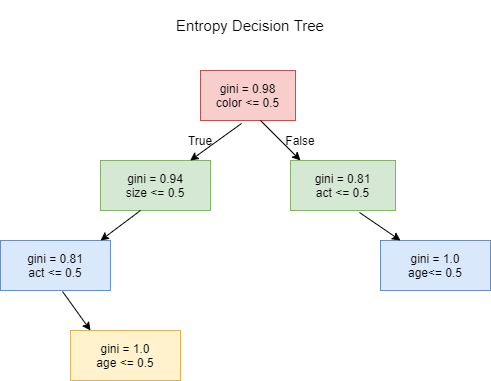

In [58]:
from IPython.core.display import Image, display
display(Image(r'C:\Users\Chaitali\Downloads\Entropy.png', width=500, unconfined=True))